# Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **restaurant** in **Delhi**, India.

Since there are lots of restaurants in Delhi we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **areas with high number of other venues**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We will use our data science powers to generate a few most promising neighborhoods based on this criteria which can be used as starting points for final exploration by **stakeholders**. 

## Data <a name="data"></a>

**To solve the problem, we need the following data:**  

* List of **neighborhoods in Delhi**. This defines the range of area of consideration in the project which is Delhi,capital city of India
* **Latitude and longitude coordinates** of each neighborhoods. These are needed in order to plot the neighborhoods on map and also to get the venues in each neighborhoods.
* **Venue Data**, which will be used to perform clustering on neighborhoods.

### Sources of Data and its extraction

* The neighborhood list data can be found in the following wikipedia page link (https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi). By web scraping we can extract the data from the page, using python requests and BeautifulSoup packages.

* The latitude and longitude(geographical coordinates) data of the neighborhoods can be extracted using the geocoder package of python.However a very few neighborhoods geographical coordinates are not found using geocoder package which can be separately found

* Lastly we will use FourSquare API to get venue Data of neighborhoods. Foursquare has one of the largest Database of more than 105 million places worldwide.

###  Import libraries

In [805]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

import sklearn
import json
import folium

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import geocoder

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup


Foursquare_credentials is used in the following code.

In [928]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20200430' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [817]:
address = 'New Delhi, Delhi'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
d_Latitude = location.latitude
d_Longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(d_Latitude, d_Longitude))

The geograpical coordinate of Delhi are 28.6141793, 77.2022662.


In [818]:

map_new_delhi = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=11)

map_new_delhi

In [819]:
map_new_delhi.save('map_new_delhi.html')

Extracting **neighborhoods data** from Web using **BeautifulSoup** library.

In [820]:
url= 'https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi'



response=requests.get(url).text

soup = BeautifulSoup(response, 'html5lib')


soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<title>Neighbourhoods of Delhi - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsIR4gpAICsAAJt2MeAAAABK","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighbourhoods_of_Delhi","wgTitle":"Neighbourhoods of Delhi","wgCurRevisionId":951146027,"wgRevisionId":951146027,"wgArticleId":7375737,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from December 2018","Use Indian English from January 2016","All Wikipedia articles written in Indian English","Commons category link is on

In [821]:
Borough_statement=soup.find_all('span', class_= "mw-headline")
Borough=[Borough_statement[i].text for i in range(len(Borough_statement))]
Borough=Borough[:9]
d=len(Borough)

In [822]:
Delhi_df=pd.DataFrame(columns=['Borough','Neighborhood'])

a=soup.find_all('ul')

Delhi_df=pd.DataFrame(columns=['Borough','Neighborhood'])
for i in range(1,10):
    c=[]
    d=[]
    for j in range(len(a[i].find_all('li'))):
        c.append(a[i].find_all('li')[j].text)
        d.append(Borough[i-1])
    df2=pd.DataFrame({'Borough':d,'Neighborhood':c})
    Delhi_df=Delhi_df.append(df2,ignore_index=True)


In [823]:
Delhi_df.head()

,Borough,Neighborhood
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Azadpur
3,North West Delhi,Bawana
4,North West Delhi,Begum Pur


In [824]:
l=len(Delhi_df)

Using *Geocoder* library to extract **geographical coordinates** of neighborhoods of Delhi. print(1) statement is used to check  if there is any problem.

In [827]:
latitude=[]
longitude=[]
for i in range(l):
    address='{},{}'.format(Delhi_df.loc[i,'Neighborhood'],Delhi_df.loc[i,'Borough'])
    location=None
    p=10
    while location== None:
        location = geocoder.arcgis(address)
        p=p-1
    lat_lng_coords = location.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Checking if the coordinates given by the geocoder library is correct. If not, we replace it with correct coordinates using google search.

In [828]:
for i in range(l):
    if latitude[i]>28.88 or latitude[i]<28.41:
        print(latitude[i])
        print(i)
        print(Delhi_df.iloc[i].Neighborhood)
        
    if longitude[i]>77.4 or longitude[i]<76.8:
        print(longitude[i])
        print(i)
        print(Delhi_df.iloc[i].Neighborhood)


27.199430000000064
24
Ghantewala
78.00437000000005
24
Ghantewala
31.61937000000006
29
Lahori Gate
74.86421000000007
29
Lahori Gate
26.46804000000003
99
Dayanand Colony
74.61219000000006
99
Dayanand Colony
23.259270000000072
128
Nizamuddin West
77.46631000000008
128
Nizamuddin West
30.50198000000006
168
Dhaula Kuan
77.47608000000008
168
Dhaula Kuan


In [829]:
latitude[24]=28.6561
latitude[29]=28.657110 
latitude[99]=28.5625
latitude[128]=28.5892
latitude[168]=28.5956


longitude[24]=77.2300
longitude[29]=77.218831
longitude[99]=77.2484
longitude[128]=77.2427
longitude[168]=77.1628

In [830]:
Delhi_df['Latitude']=latitude
Delhi_df['Longitude']=longitude

In [831]:
Delhi_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,North West Delhi,Adarsh Nagar,28.72035,77.17264
1,North West Delhi,Ashok Vihar,28.69037,77.17609
2,North West Delhi,Azadpur,28.71242,77.17304
3,North West Delhi,Bawana,28.79767,77.04522
4,North West Delhi,Begum Pur,28.73262,77.05213


In [832]:
map_delhi = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Delhi_df['Latitude'], Delhi_df['Longitude'], Delhi_df['Borough'], Delhi_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

In [833]:
map_delhi.save('map_delhi.html')

In [834]:
import pyproj

import math

Using pyproj library to convert **geographical coordinates into Cartesian coordinates** in order in measure distances of every neighborhood from city center.

In [836]:
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=43, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=43, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

In [837]:
def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [838]:
center_x,center_y=lonlat_to_xy(d_Longitude, d_Latitude)

C:\Users\premreeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


In [839]:
x, y = lonlat_to_xy(longitude, latitude)

C:\Users\premreeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


In [840]:
dist=[]
for i in range(len(x)):
    x0=x[i]
    y0=y[i]
    dist.append(calc_xy_distance(x0, y0, center_x,center_y))

In [841]:
Delhi_df['x']=x
Delhi_df['y']=y
Delhi_df['Distance_from_center']=dist


In [842]:
Delhi_df.head()

,Borough,Neighborhood,Latitude,Longitude,x,y,Distance_from_center
0,North West Delhi,Adarsh Nagar,28.72035,77.17264,712209.619290,3.178937e+06,12120.035971
1,North West Delhi,Ashok Vihar,28.69037,77.17609,712607.322827,3.175621e+06,8824.928801
2,North West Delhi,Azadpur,28.71242,77.17304,712264.722359,3.178059e+06,11258.470044
3,North West Delhi,Bawana,28.79767,77.04522,699613.861936,3.187286e+06,25479.918769
4,North West Delhi,Begum Pur,28.73262,77.05213,700412.743855,3.180089e+06,19691.835692


### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those.

In [843]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [844]:
LIMIT=500



Delhi_venues = getNearbyVenues(names=Delhi_df['Neighborhood'],latitudes=Delhi_df['Latitude'],longitudes=Delhi_df['Longitude']
                                  )

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Rohini Sub City
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Ghantewala
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Tis Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Mukherjee Nagar
Nand Nagri
Naveen Shahdara
New Usmanpur
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Rajender Nagar
Sadar Bazaar
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishn

In [845]:
Delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.72035,77.17264,Giani's,28.717900,77.173907,Ice Cream Shop
1,Adarsh Nagar,28.72035,77.17264,HDFC Bank,28.717583,77.171573,ATM
2,Adarsh Nagar,28.72035,77.17264,Yummy Tummy Restaurant,28.718103,77.175133,Fast Food Restaurant
3,Adarsh Nagar,28.72035,77.17264,Axis Bank ATM,28.723032,77.170631,ATM
4,Ashok Vihar,28.69037,77.17609,Domino's Pizza,28.693000,77.177000,Pizza Place


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Delhi that have low restaurant density.

First, we have collected the required **data: location and type (category) of every venues in Delhi and distance of each neighborhoods from delhi center**.We have also **identified all restaurants** in each neighborhood. 

Second step in our analysis will be distribution of neighborhoods on the basis of distance from center, calculation and exploration of '**venues density and restaurant density**' across different areas of Delhi - we will cluster them in different groups, then we will use **map** to show the distribution of neighborhoods.
  
Third step is to identify few promising areas close to city center with low number of restaurants in general (*and* high number of other venues).We will use the best combination of  above distribution to locate optimal locations



## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data.First let's count the **numbers of neighborhoods in different distance ranges** from Delhi center.

=====================================================================================================================

In [846]:
dist_clusters=[[],[],[],[]]
dist_clusters[0]=Delhi_df[Delhi_df.Distance_from_center<=3000]
dist_clusters[1]=Delhi_df[(Delhi_df.Distance_from_center>=3000) & (Delhi_df.Distance_from_center<=10000)]
dist_clusters[2]=Delhi_df[(Delhi_df.Distance_from_center>=10000) & (Delhi_df.Distance_from_center<=20000)]
dist_clusters[3]=Delhi_df[Delhi_df.Distance_from_center>=20000]


In [847]:
dist_ranges=['<3000','3000-10000','10000-20000','>20000']

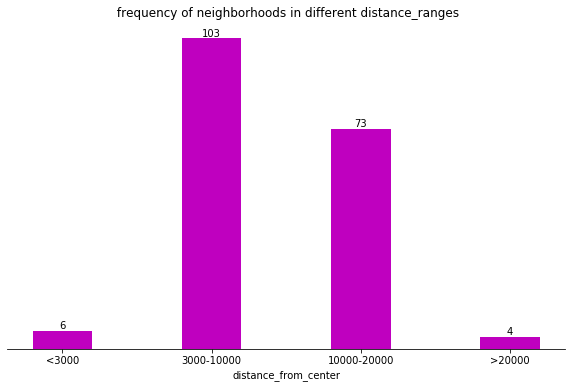

In [927]:
plt.figure(figsize=(10, 6))
plt.title(' frequency of neighborhoods in different distance_ranges')
plt.xlabel('distance_from_center')

len_dist_clusters=[]
for i in range(4):
    len_dist_clusters.append(len(dist_clusters[i]))
bar=plt.bar(dist_ranges,len_dist_clusters, width=0.4, color='m')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.savefig('neighborhood_distance_bar.png',dpi=100)
plt.show()

In [849]:
delhi_dist_map = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=10)

x = np.arange(4)
ys = [i+x+(i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
            [d_Latitude, d_Longitude],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.7,
            parse_html=False).add_to(delhi_dist_map)  

# add markers to map
for i in range(4):
    for lat, lng, borough, neighborhood in zip(dist_clusters[i]['Latitude'], dist_clusters[i]['Longitude'], dist_clusters[i]['Borough'], dist_clusters[i]['Neighborhood']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=rainbow[i],
            fill=True,
            fill_color=rainbow[i],
            fill_opacity=0.7,
            parse_html=False).add_to(delhi_dist_map)  

delhi_dist_map

In [850]:
delhi_dist_map.save('delhi_dist_map.html')

--------------------------------------------------------------------------------------------------------
As we can see that there are very few neighborhood which are very close or very far from the city center. We can eleminate those neighborhoods which lies beyond 20 km from city center. Its best to have restaurants in neighborhoods within 3 km range.
Close neighborhoods have **easy access to city(easy labour and groceries), strong socio-economic dynamics, high population density**. So they are relatively better places than neighborhoods away from the city center. Hence neighborhoods in **0-10 km range** is preferable.

-------------------------------------------------------------------------------------------------------------------

In [851]:
print(dist_clusters[3].Neighborhood.values.tolist())
print(dist_clusters[0].Neighborhood.values.tolist())

['Bawana', 'Karala', 'Narela', 'Najafgarh']
['Kotwali', 'Barakhamba Road', 'Chanakyapuri', 'Connaught Place', 'Gole Market', 'Khan Market']


----------------------------------------------------------------------------------------------------------- 
We can see that **Bawana, Karala, Narela, Najafgarh** lies beyond 20km range, hence they are not favourable areas for restaurants.On the other hand **Kotwali, Barakhamba Road, Chanakyapuri, Connaught Place, Gole Market, Khan Market** are around city center within 3km range and are most favorable by this criteria.

------------------------------------------------------------------------------------------------------------

Now let's create a bar chart showing the **venue density** in each borough.

-------------------------------------------------------------------------------------------------------------

In [852]:
Delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.72035,77.17264,Giani's,28.717900,77.173907,Ice Cream Shop
1,Adarsh Nagar,28.72035,77.17264,HDFC Bank,28.717583,77.171573,ATM
2,Adarsh Nagar,28.72035,77.17264,Yummy Tummy Restaurant,28.718103,77.175133,Fast Food Restaurant
3,Adarsh Nagar,28.72035,77.17264,Axis Bank ATM,28.723032,77.170631,ATM
4,Ashok Vihar,28.69037,77.17609,Domino's Pizza,28.693000,77.177000,Pizza Place


In [853]:
Delhi_venues.groupby('Neighborhood').count().reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,4,4,4,4,4,4
1,Alaknanda,4,4,4,4,4,4
2,Anand Vihar,1,1,1,1,1,1
3,Ashok Nagar,2,2,2,2,2,2
4,Ashok Vihar,6,6,6,6,6,6
...,...,...,...,...,...,...,...
154,Vasant Vihar,4,4,4,4,4,4
155,Vasundhara Enclave,4,4,4,4,4,4
156,Vikaspuri,2,2,2,2,2,2
157,Vishwas Nagar,1,1,1,1,1,1


In [854]:
Borough_venue=pd.merge(Delhi_venues,Delhi_df)
Borough_venue=Borough_venue.groupby('Borough').count().reset_index()

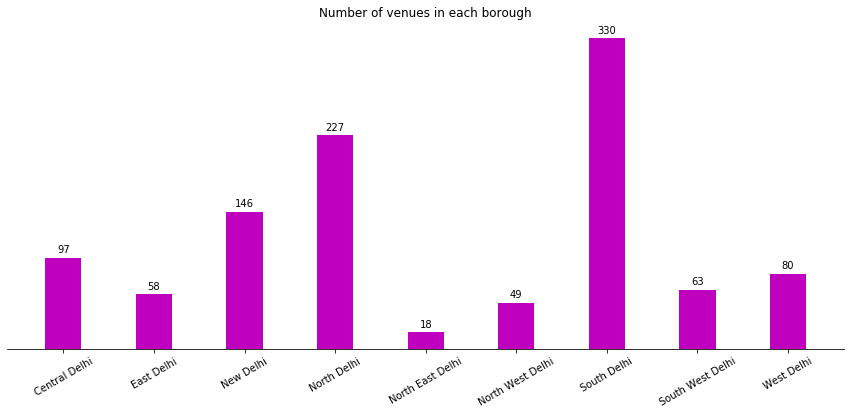

In [926]:
plt.figure(figsize=(15, 6))
plt.title('Number of venues in each borough')
bar=plt.bar(Borough_venue['Borough'],Borough_venue['Venue'], width=0.4, color='m')
plt.xticks(rotation=30)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+3, '%d' % int(height), ha='center', va='bottom')
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.savefig('venue_freqency_bar.png',dpi=100)
plt.show()

-------------------------------------------------------------------------------------------------------
We can see that **South Delhi, North Delhi and New Delhi** are potential markets because it has lots of venues that implies lots of croud.

-------------------------------------------------------------------------------------------------------

In [856]:
print('There are {} uniques categories.'.format(len(Delhi_venues['Venue Category'].unique())))

There are 164 uniques categories.


In [857]:
for i in range(len(c)):
    Delhi_c_onehot = pd.get_dummies(Delhi_venues[['Venue Category']], prefix="", prefix_sep="")


    Delhi_c_onehot['Neighborhood'] = Delhi_venues['Neighborhood'] 


    fixed_columns = [Delhi_c_onehot.columns[-1]] + list(Delhi_c_onehot.columns[:-1])
    Delhi_c_onehot = Delhi_c_onehot[fixed_columns]


Delhi_c_onehot.head()

,Women's Store,ATM,Adult Boutique,Afghan Restaurant,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Theater,Tibetan Restaurant,Tourist Information Center,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [858]:
for i in range(len(c)):venue_grouped = Delhi_c_onehot.groupby('Neighborhood').sum().reset_index()
venue_grouped.head()

,Neighborhood,Women's Store,ATM,Adult Boutique,Afghan Restaurant,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,...,Theater,Tibetan Restaurant,Tourist Information Center,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Wings Joint
0,Adarsh Nagar,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaknanda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anand Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ashok Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [859]:
a=venue_grouped.columns.str.find('Restaurant')

In [860]:
b=[]
for i in range(len(a)):
        if a[i]!=-1:
            b.append(venue_grouped.columns[i])

In [861]:
venue_restaurants=pd.DataFrame()

In [862]:
venue_restaurants['Neighborhood']=venue_grouped['Neighborhood']
venue_restaurants[b]=venue_grouped[b]
venue_restaurants["sum"] = df_new.sum(axis=1)
venue_restaurants

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,Bengali Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,...,Restaurant,Scandinavian Restaurant,South Indian Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,sum
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1,Alaknanda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,Anand Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,Ashok Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Vasant Vihar,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
155,Vasundhara Enclave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
156,Vikaspuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
157,Vishwas Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [863]:
df_clustering=df_new[['Neighborhood','sum']]
ccc=df_clustering.drop(["Neighborhood"], 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(ccc)
df_clustering["Cluster Labels"]=kmeans.labels_

C:\Users\premreeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [864]:
Delhi_clustered= pd.merge(Delhi_df,df_clustering)

In [865]:
Borough_restaurants=pd.merge(df_clustering,Delhi_df)
Borough_restaurants=Borough_restaurants[['Borough','sum']]
Borough_restaurants=Borough_restaurants.groupby('Borough').sum().reset_index()
Borough_restaurants

,Borough,sum
0,Central Delhi,25
1,East Delhi,10
2,New Delhi,47
3,North Delhi,61
4,North East Delhi,2
5,North West Delhi,11
6,South Delhi,113
7,South West Delhi,15
8,West Delhi,20


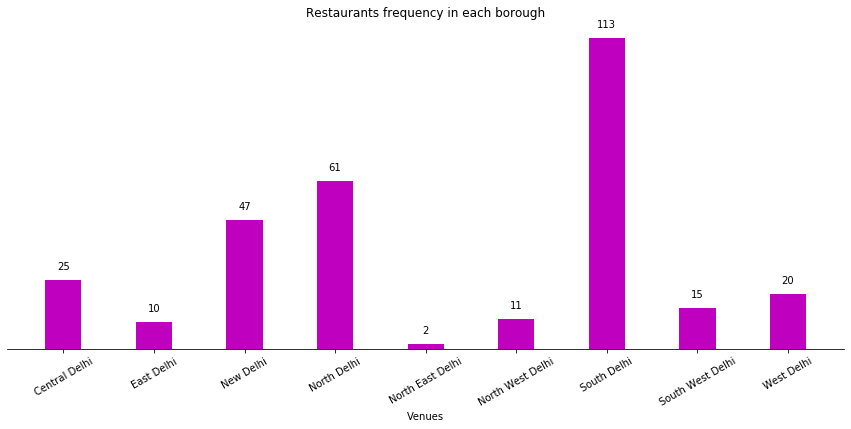

In [925]:
plt.figure(figsize=(15, 6))
plt.title('Restaurants frequency in each borough')
plt.xlabel('Venues')
bar=plt.bar(Borough_restaurants['Borough'],Borough_restaurants['sum'], width=0.4, color='m')
plt.xticks(rotation=30)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+3, '%d' % int(height), ha='center', va='bottom')
    
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')

plt.savefig('restaurant_freqency_bar.png',dpi=100)
plt.show()

------------------------------------------------------------------------------------------------------------
From the chart we can see that **South Delhi, North Delhi, New Delhi** has a lot of restaurants that opposes the fact that these  areas has lots of venues. Because more restaurants is less favourable. Hence we need to look other factors to decide.

------------------------------------------------------------------------------------------------------------

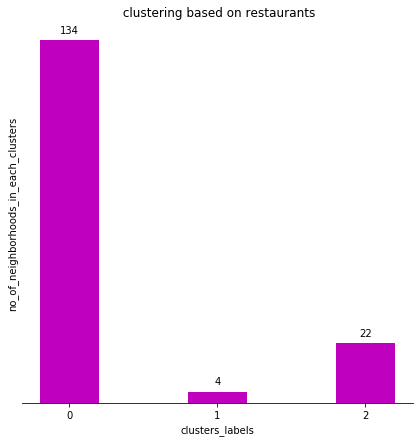

In [924]:

plt.figure(figsize=(7, 7))
frameon=False
plt.title(' clustering based on restaurants')
plt.ylabel('no_of_neighborhoods_in_each_clusters')

plt.xlabel('clusters_labels')
plt.xticks(range(3),('0', '1', '2'))
len_Delhi_clustered=[0,0,0]
for i in range(3):
    len_Delhi_clustered[i]=len(Delhi_clustered[Delhi_clustered['Cluster Labels']==i])
rest_cluster_bar=plt.bar([0, 1, 2], len_Delhi_clustered,color='m', width=0.4)
for rect in rest_cluster_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+2, '%d' % int(height), ha='center', va='bottom')
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.savefig('restaurant_cluster_bar.png',dpi=100)
plt.show()

-----------------------------------------------------------------------------------------------------------
Most of the neighborhoods have very less number of restaurants, hence there is a lot of scope for different types of restaurants.

-----------------------------------------------------------------------------------------------------------

In [879]:
kclusters=3
restaurants_map_clusters = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_clustered['Latitude'], Delhi_clustered['Longitude'], Delhi_clustered['Neighborhood'], Delhi_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(restaurants_map_clusters)
       
restaurants_map_clusters

In [880]:
restaurants_map_clusters.save('restaurants_map_clusters.html')

In [870]:
a=venue_grouped.columns.str.find('Restaurant')
b=[]
for i in range(len(a)):
        if a[i]==-1:
            b.append(venue_grouped.columns[i])
other_venues=pd.DataFrame()
other_venues['Neighborhood']=venue_grouped['Neighborhood']
other_venues[b]=venue_grouped[b]
other_venues["sum"] = other_venues.sum(axis=1)
other_venues

,Neighborhood,Women's Store,ATM,Adult Boutique,Airport Service,Arcade,Art Gallery,Art Museum,Athletics & Sports,BBQ Joint,...,Supplement Shop,Tea Room,Theater,Tourist Information Center,Track Stadium,Trail,Train Station,University,Wings Joint,sum
0,Adarsh Nagar,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,Alaknanda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,Anand Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Ashok Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Vasant Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
155,Vasundhara Enclave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
156,Vikaspuri,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
157,Vishwas Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [871]:
other_cluster=other_venues[['Neighborhood','sum']]
cc=other_cluster.drop(["Neighborhood"], 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(cc)
other_cluster["Cluster Labels"]=kmeans.labels_

C:\Users\premreeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [872]:
Delhi_other_clustered= pd.merge(Delhi_df,other_cluster)

In [873]:
Delhi_other_clustered

,Borough,Neighborhood,Latitude,Longitude,x,y,Distance_from_center,sum,Cluster Labels
0,North West Delhi,Adarsh Nagar,28.720350,77.172640,712209.619290,3.178937e+06,12120.035971,3,0
1,North West Delhi,Ashok Vihar,28.690370,77.176090,712607.322827,3.175621e+06,8824.928801,5,0
2,North West Delhi,Azadpur,28.712420,77.173040,712264.722359,3.178059e+06,11258.470044,1,0
3,North West Delhi,Bawana,28.797670,77.045220,699613.861936,3.187286e+06,25479.918769,1,0
4,North West Delhi,Dhaka,28.707093,77.204518,715351.249228,3.177525e+06,10301.751414,4,0
...,...,...,...,...,...,...,...,...,...
164,West Delhi,Shivaji Place,28.652650,77.121390,707336.002196,3.171344e+06,8985.660024,8,2
165,West Delhi,Tihar Village,28.635470,77.107780,706039.080766,3.169417e+06,9537.634963,3,0
166,West Delhi,Tilak Nagar,28.640890,77.089220,704213.867113,3.169985e+06,11445.515801,0,0
167,West Delhi,Uttam Nagar,28.617390,77.052810,700698.809716,3.167319e+06,14622.667548,2,0


In [874]:
Borough_other_clustered=Delhi_other_clustered.groupby('Borough').sum().reset_index()


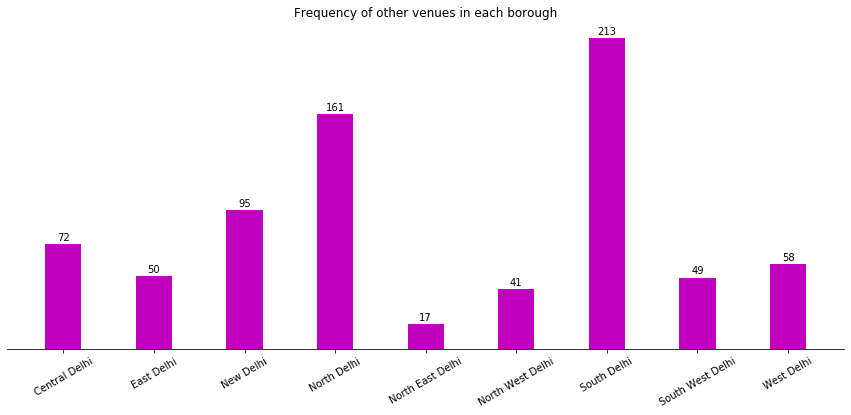

In [923]:
plt.figure(figsize=(15, 6))
plt.title('Frequency of other venues in each borough')
plt.xticks(rotation=30)
bar=plt.bar(Borough_other_clustered['Borough'],Borough_other_clustered['sum'], width=0.4, color='m')
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+1, '%d' % int(height), ha='center', va='bottom')
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.savefig('other_venue_frequency_bar.png',dpi=100)
plt.show()

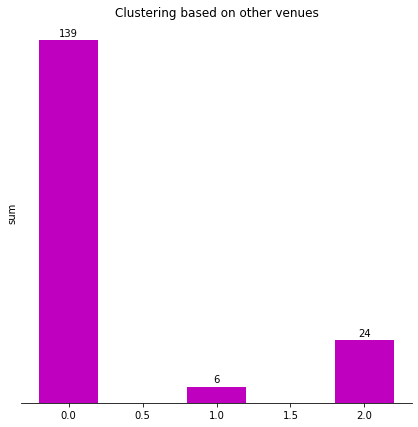

In [922]:

plt.figure(figsize=(7, 7))
plt.title('Clustering based on other venues')
plt.ylabel('sum')
len_Delhi_other_clustered=[]
for i in range(3):
    len_Delhi_other_clustered.append(len(Delhi_other_clustered[Delhi_other_clustered['Cluster Labels']==i]))

bar=plt.bar([0,1,2], len_Delhi_other_clustered, width=0.4, color='m')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height+1, '%d' % int(height), ha='center', va='bottom')
plt.tick_params(
    axis='y',          
    which='both', 
    left=False,     
    right=False,         
    labelleft=False)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.savefig('other_venue_cluster_bar.png',dpi=100)

plt.show()



In [877]:
len_Delhi_other_clustered

[139, 6, 24]

In [920]:
kclusters=3
other_venues_map_clusters = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_other_clustered['Latitude'], Delhi_other_clustered['Longitude'], Delhi_other_clustered['Neighborhood'], Delhi_other_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(other_venues_map_clusters)
       
other_venues_map_clusters

In [921]:
other_venues_map_clusters.save('other_venues_map_clusters.html')

In [883]:

neighborhoods1=Delhi_other_clustered['Neighborhood'][(Delhi_other_clustered['Cluster Labels']==1) + (Delhi_other_clustered['Cluster Labels']==2)].values.tolist()
neighborhoods2=Delhi_clustered.Neighborhood[Delhi_clustered['Cluster Labels']==0].values.tolist()

neighborhoods3=dist_clusters[0].Neighborhood.values.tolist()+dist_clusters[1].Neighborhood.values.tolist()
neighborhoods4=dist_clusters[2].Neighborhood.values.tolist()

C:\Users\premreeta\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [884]:
common_list=list(set(neighborhoods1) & set(neighborhoods2) & set(neighborhoods3))
common_list

['Naraina',
 'Greater Kailash',
 'Nehru Place',
 'Hauz Khas',
 'Malviya Nagar',
 'Barakhamba Road',
 'Safdarjung Enclave',
 'Saket',
 'Kamla Nagar',
 'Shakti Nagar',
 'Kailash Colony']

-----------------------------------------------------------------------------------------------------------
Using the intersection of above criterias we found that neighborhoods **Naraina, Greater Kailash, Nehru Place, Hauz Khas, Malviya Nagar, Barakhamba Road, Safdarjung Enclave, Saket, Kamla Nagar, Shakti Nagar, Kailash Colony** are best to open restaurants. As they are within the range of 10km, they have very less number of restaurants and they have very high number of other venues.

------------------------------------------------------------------------------------------------------------

In [885]:
chosen_df=pd.DataFrame(columns=Delhi_df.columns)

for i in range(len(common_list)):
    chosen_df=chosen_df.append(Delhi_df[Delhi_df['Neighborhood']==common_list[i]])


In [893]:
chosen_df

,Borough,Neighborhood,Latitude,Longitude,x,y,Distance_from_center
157,South West Delhi,Naraina,28.631490,77.137130,708916.700739,3.169027e+06,6653.393613
104,South Delhi,Greater Kailash,28.548490,77.236670,718821.870883,3.160006e+06,8022.067978
125,South Delhi,Nehru Place,28.550780,77.255490,720658.843280,3.160294e+06,8747.019674
107,South Delhi,Hauz Khas,28.551090,77.203990,715618.493747,3.160235e+06,6995.361644
122,South Delhi,Malviya Nagar,28.533940,77.207020,715950.002251,3.158339e+06,8906.525120
67,New Delhi,Barakhamba Road,28.627956,77.228354,717844.072195,3.168798e+06,2973.711026
131,South Delhi,Safdarjung Enclave,28.564840,77.194680,714679.524823,3.161742e+06,5519.292230
133,South Delhi,Saket,28.524070,77.206770,715945.666001,3.157245e+06,9998.150705
26,North Delhi,Kamla Nagar,28.683760,77.201630,715116.802452,3.174934e+06,7713.203320
18,North Delhi,Shakti Nagar,28.680730,77.193740,714351.855712,3.174584e+06,7424.026240


In [887]:
Chosen_neighborhoods = folium.Map(location=[d_Latitude, d_Longitude], zoom_start=10)


# add markers to map
for lat, lng, borough, neighborhood in zip(chosen_df['Latitude'], chosen_df['Longitude'], chosen_df['Borough'], chosen_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='maroon',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Chosen_neighborhoods)  
    
Chosen_neighborhoods

In [889]:
Chosen_neighborhoods.save('Chosen_neighborhoods.html')

In [890]:
list(set(neighborhoods1) & set(neighborhoods2) & set(neighborhoods4))

['Pitam Pura', 'Patparganj', 'Kalkaji']

--------------------------------------------------------------------------------------------------------
**Pitam Pura, Patparganj, Kalkaji** also have less number of restaurants and high number of venues, but it lies between 10-20 km range.

-----------------------------------------------------------------------------------------------------------

In [892]:
for i in range(len(chosen_df.groupby('Borough').count().index)):
    print(chosen_df.groupby('Borough').count().index[i])
    print(chosen_df.groupby('Borough').count().Neighborhood.values.tolist()[i])
  

New Delhi
1
North Delhi
3
South Delhi
7
South West Delhi
1


By mistake Shakti Nagar is repeated twice in chosen_df.

------------------------------------------------------------------------------------------------------
**South Delhi(-7) and North Delhi(-2)** are regions with maximum number of neighborhoods with desired qualities.

------------------------------------------------------------------------------------------------------

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in Delhi, there are potential areas which has low restaurant density. We found **11 neighborhoods** with low number of restaurants and high number of other venues within 10km range from Delhi center. Those are the potential neighborhoods based on the criteria we chose which offer a combination of **high population, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low restaurant density**.  
   
We used the venues data to find the restaurants density. We divided neighborhoods in 3 clusters on the basis of restaurants density(very low, adequate, high numbered as 0,2,1 respectively). We found that a huge amount of neighborhoods has low restaurants density. We chose the neighborhoods lying in **cluster '0'**.   
  
We found other venues density as well by using venues data. Similarly we divided the neighborhoods in 3 clusters based on venues density(very low, adequate, high numbered as 0,2,1 respectively). Same trend was found in this chart as well. We chose the neighborhoods lying in **clusters '1' and '2'**.  
  
We measured distances of each neighborhood from the city center and clustered them in 4 groups('<3000m','3000-10000m','10000-20000m','>20000m'). We found that most of the  neighborhoods belong to 3000-20000m range. We chose the neighborhoods which lied in **10000m range**.

Collectively we found 11 neighborhoods namely **Naraina, Greater Kailash, Nehru Place, Hauz Khas, Malviya Nagar, Barakhamba Road, Safdarjung Enclave, Saket, Kamla Nagar, Shakti Nagar, Kailash Colony**, which fulfilled all the criterias.

This, of course, does not imply that those areas are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Delhi center but not crowded with existing restaurants - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Delhi neighborhood areas close to center with low number of restaurants  in order to aid stakeholders in narrowing down the search for optimal location for a new restaurant. By calculating restaurant density distribution from Foursquare data and distances from city center using pyproj we created parameters to decide optimality of a location.
Clustering of those locations was then performed in order to find best locations which can be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.